In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
df = pd.read_csv("../input/BreadBasket_DMS.csv")
df.info()
df.columns
df.head()

['BreadBasket_DMS.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [2]:
print("How many unique items are sold at this bakery?")
print("Answer: {} unique items".format(len(df["Item"].unique())))

How many unique items are sold at this bakery?
Answer: 95 unique items


In [3]:
print("What are the unique items sold at this bakery?")
print("Answer: {}".format(df["Item"].unique()))

What are the unique items sold at this bakery?
Answer: ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken 

In [4]:
# Checking for missing data in the 'items' columns.
df["Item"].isna().any()

# Understanding '.loc[]'
df.loc[0] # Returns a Series.
df.loc[[0, 1]] # Returns a DataFrame

# Although it says False (which implies that there are no missing data), we do have missing data.
# Why? Because the dataset's missing data in this column was filled with the word "NONE". 
# Take a look:
print("How many 'NONE' items do we have in the dataset?")
print("Answer: {} 'NONE' items.".format(len(df.loc[df["Item"] == "NONE", :])))

# The following line gets all the rows where 'Item' equals to 'NONE', and all the columns of that
# row (we do that by writing the colon, :)
len(df.loc[df["Item"] == "NONE", :])

How many 'NONE' items do we have in the dataset?
Answer: 786 'NONE' items.


786

In [5]:
# Let's remove this data with the items set to 'NONE' because there's no way we can find out which
# products should be there.
df = df.loc[df["Item"] != "NONE"]

# Clean now. Look at it:
len(df.loc[df["Item"] == "NONE"]) # 0 :)

0

In [6]:
# Let's see if we can get the oldest and newest date in the dataset.
print(df["Date"].min())
print(df["Date"].max())

# Let's see how many of each product were sold between the dates above.
df["Item"].value_counts().head(5)

2016-10-30
2017-04-09


Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Item, dtype: int64

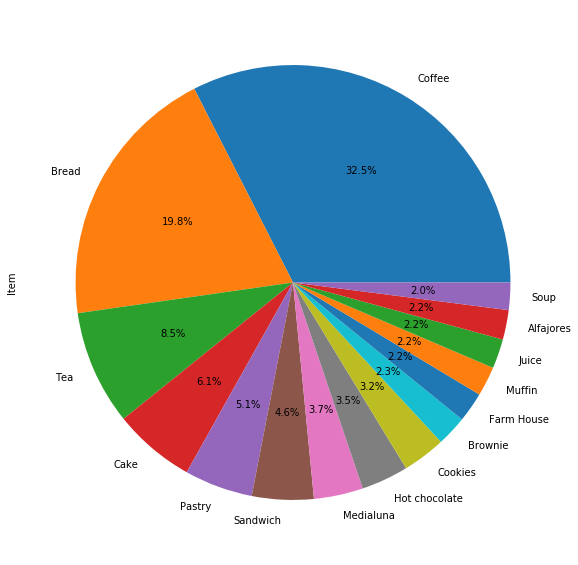

In [7]:
# GRAPH 1
# Plotting the fifteen most sold products at Bread Basket Bakery.
plt.figure(1, figsize=(10, 10))
# plt.pie(df["Item"].value_counts().head(15), autopct="%1.1f%%") # Does not label the data.
df['Item'].value_counts().head(15).plot.pie(autopct="%1.1f%%")
plt.show()

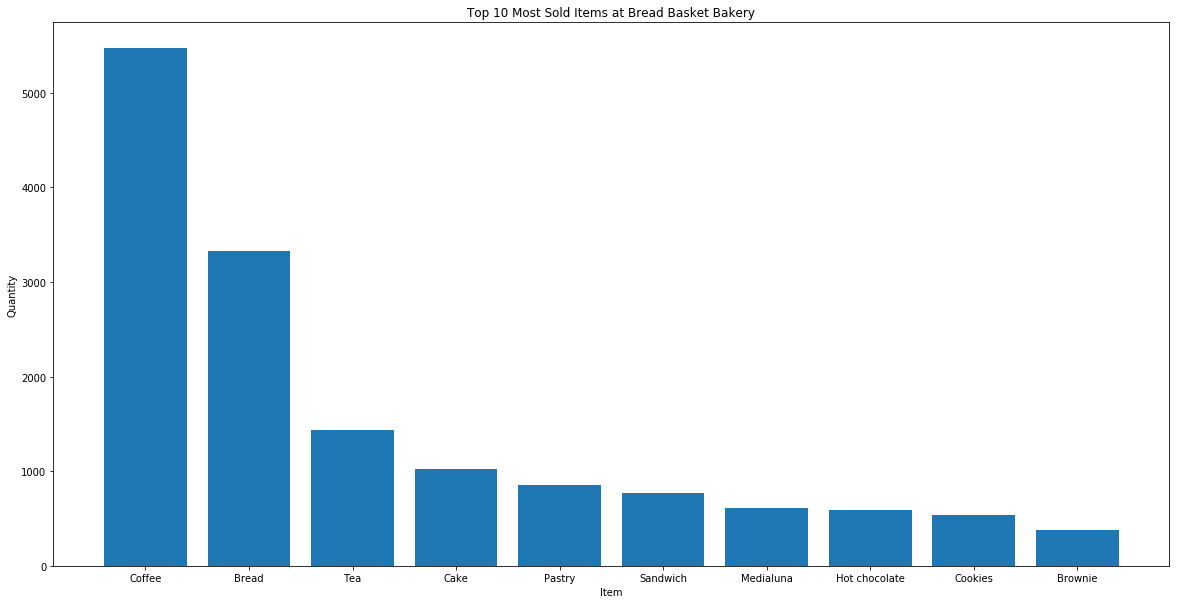

In [8]:
# GRAPH 2
itemNames = df["Item"].value_counts().index
itemValues = df["Item"].value_counts().values

plt.figure(figsize=(20, 10))
plt.xlabel("Item")
plt.ylabel("Quantity")
plt.title("Top 10 Most Sold Items at Bread Basket Bakery")
plt.bar(itemNames[:10], itemValues[:10])
plt.show()